In [1]:
import json
import pandas as pd
today = "2019-03-23"

In [2]:
import json
def read_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

In [3]:
# list of arrays for each model.
# DIR = "./"
DIR = f"./out/{today}/"
DIR = f"tmp/out/{today}/"
cv_results = {alg: read_json(DIR + f"{today}-{alg}-cv_results.json") for alg in ["hyperband", "hyperband-w-patience", "patience"]}

# list of arrays with each score/time/etc. Each model entered more than once.
histories = {alg: read_json(DIR + f"{today}-{alg}-history.json")for alg in ["hyperband", "hyperband-w-patience", "patience"]}

ALGS = ["hyperband", "hyperband-w-patience", "patience", "passive"]
params = {alg: read_json(DIR + f"{today}-{alg}-params.json") for alg in ALGS}

best = {alg: read_json(DIR + f"{today}-{alg}-best-params-and-score.json") for alg in ALGS}

In [4]:
best

{'hyperband': {'params': {'train_split': None,
   'optimizer__weight_decay': 1.0375666787451848e-05,
   'optimizer__nesterov': True,
   'optimizer__momentum': 0.6326326326326326,
   'optimizer__lr': 1.2276910479883594,
   'optimizer': 'SGD',
   'module__init': 'xavier_uniform_',
   'module__activation': 'PReLU',
   'batch_size': 64},
  'score': -0.09298719465732574},
 'hyperband-w-patience': {'params': {'train_split': None,
   'optimizer__weight_decay': 1.0375666787451848e-05,
   'optimizer__nesterov': True,
   'optimizer__momentum': 0.6326326326326326,
   'optimizer__lr': 1.2276910479883594,
   'optimizer': 'SGD',
   'module__init': 'xavier_uniform_',
   'module__activation': 'PReLU',
   'batch_size': 64},
  'score': -0.0936482772231102},
 'patience': {'params': {'train_split': None,
   'optimizer__weight_decay': 0,
   'optimizer__nesterov': True,
   'optimizer__momentum': 0.7887887887887888,
   'optimizer__lr': 2.1844360711494275,
   'optimizer': 'SGD',
   'module__init': 'xavier_nor

In [5]:
params["hyperband"]

{'aggressiveness': 3,
 'max_iter': 243,
 'patience': False,
 'random_state': 42,
 'scores_per_fit': 1,
 'scoring': None,
 'test_size': None,
 'tol': 0.001}

In [6]:
for alg, d in cv_results.items():
    print(alg)
    print(d.keys(), end="\n\n")

hyperband
dict_keys(['mean_partial_fit_time', 'mean_score_time', 'std_partial_fit_time', 'std_score_time', 'test_score', 'estimator_id', 'params', 'partial_fit_calls', 'param_train_split', 'param_optimizer__weight_decay', 'param_optimizer__nesterov', 'param_optimizer__momentum', 'param_optimizer__lr', 'param_optimizer', 'param_module__init', 'param_module__activation', 'param_batch_size', 'rank_test_score'])

hyperband-w-patience
dict_keys(['mean_partial_fit_time', 'mean_score_time', 'std_partial_fit_time', 'std_score_time', 'test_score', 'estimator_id', 'params', 'partial_fit_calls', 'param_train_split', 'param_optimizer__weight_decay', 'param_optimizer__nesterov', 'param_optimizer__momentum', 'param_optimizer__lr', 'param_optimizer', 'param_module__init', 'param_module__activation', 'param_batch_size', 'rank_test_score'])

patience
dict_keys(['mean_partial_fit_time', 'mean_score_time', 'std_partial_fit_time', 'std_score_time', 'test_score', 'estimator_id', 'params', 'partial_fit_call

In [7]:
from pprint import pprint
for alg, d in cv_results.items():
    print(alg)
    show = {k: v[0] for k, v in d.items()}
    pprint(show)

hyperband
{'estimator_id': 'bracket=4-0',
 'mean_partial_fit_time': 2.8946942488352456,
 'mean_score_time': 1.1386782328287761,
 'param_batch_size': 32,
 'param_module__activation': 'ReLU',
 'param_module__init': 'kaiming_normal_',
 'param_optimizer': 'SGD',
 'param_optimizer__lr': 1.4509807864912287,
 'param_optimizer__momentum': 0.5635635635635635,
 'param_optimizer__nesterov': True,
 'param_optimizer__weight_decay': 0.00024968784288843267,
 'param_train_split': None,
 'params': {'batch_size': 32,
            'module__activation': 'ReLU',
            'module__init': 'kaiming_normal_',
            'optimizer': 'SGD',
            'optimizer__lr': 1.4509807864912287,
            'optimizer__momentum': 0.5635635635635635,
            'optimizer__nesterov': True,
            'optimizer__weight_decay': 0.00024968784288843267,
            'train_split': None},
 'partial_fit_calls': 9,
 'rank_test_score': 16,
 'std_partial_fit_time': 0.29719743519712055,
 'std_score_time': 0.1175751290503455

In [8]:
for alg, hist in histories.items():
    print(alg, len(hist))
    pprint({k: v for k, v in hist[0].items() if "params" != k})

hyperband 349
{'bracket': 0,
 'elapsed_wall_time': 16.04062795639038,
 'estimator_id': 'bracket=0-0',
 'partial_fit_calls': 1,
 'partial_fit_time': 1.994194746017456,
 'score': -0.6776999831199646,
 'score_time': 1.0462994575500488}
hyperband-w-patience 428
{'bracket': 1,
 'elapsed_wall_time': 13.384918928146362,
 'estimator_id': 'bracket=1-0',
 'partial_fit_calls': 1,
 'partial_fit_time': 3.337860107421875e-06,
 'score': -0.7112531661987305,
 'score_time': 1.2039198875427246}
patience 8023
{'elapsed_wall_time': 13.376245975494385,
 'estimator_id': 0,
 'partial_fit_calls': 1,
 'partial_fit_time': 1.8495426177978516,
 'score': -0.6757357716560364,
 'score_time': 1.1162865161895752}


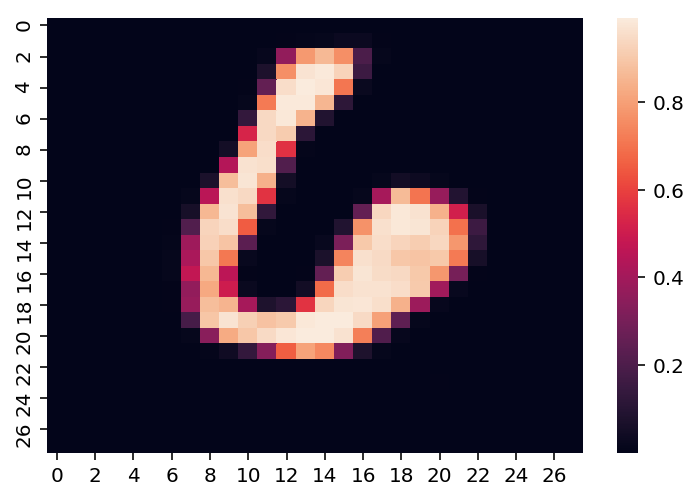

In [9]:
import numpy as np
data = np.load(DIR + f"{today}-hyperband-test.npz")
y_hat = data["y_hat"]

import seaborn as sns
sns.heatmap(y_hat[0].reshape(28, 28))

## Performance
`HyperbandCV` will find close to the best possible parameters with the given computational budget.*

<sup>* "will" := with high probability,
"close" := within log factors,
"best possible" in expected value.</sup>


In [10]:
def shape_history(history, **kwargs):
    """
    TODO: get list of times, smooth over that
    
    out = []
    for row in history:
        time = next(times)
        if time < row["time"]:
            out += [out[-1]]
        out += [process(row)]  
    """
    
    scores = {}
    pf_calls = {}
    
    out = []
    cumulative_pf_calls = 0
    
    start = history[0]["elapsed_wall_time"]
    for row in history:
        scores[row["estimator_id"]] = row["score"]
        pf_calls[row["estimator_id"]] = row["partial_fit_calls"]
        cumulative_pf_calls = sum(pf_calls.values())
        
        out += [{"best_score": max(scores.values()),
                 "elapsed_wall_time": row["elapsed_wall_time"] - start,
                 "cumulative_partial_fit_calls": sum(pf_calls.values()),
                 **kwargs}]
    return out

In [11]:
from copy import copy, deepcopy
def smooth_histories(hist_list):
    out = []
    data = {}
    hist_list = deepcopy(hist_list)
    times = sorted([h["elapsed_wall_time"] for hist in hist_list for h in hist])
    
    hists = {repeat: hist for repeat, hist in enumerate(hist_list)}
    for t in times:
        for k, hist in hists.items():
            h = deepcopy(hists[k][0])
            h.update({"elapsed_wall_time": t})
            out += [h]
            
            if hists[k][0]["elapsed_wall_time"] >= t and len(hists[k]) > 1:
                hists[k].pop(0)
    return out

In [12]:
medium_rare = [shape_history(hist, repeat=0, alg=k)
               for k, hist in histories.items()]
# medium = [smooth_histories(hist) for hist in medium_rare]

well_done = sum(medium_rare, [])

In [13]:
import pandas as pd
df = pd.DataFrame(well_done)
df.head(n=2)
df.elapsed_wall_time.describe()
print(df.alg.unique())
df.head()

['hyperband' 'hyperband-w-patience' 'patience']


,alg,best_score,cumulative_partial_fit_calls,elapsed_wall_time,repeat
0,hyperband,-0.677700,1,0.000000,0
1,hyperband,-0.674982,2,0.000001,0
2,hyperband,-0.256197,3,0.000001,0
3,hyperband,-0.256197,4,0.000002,0
4,hyperband,-0.256197,5,0.000002,0


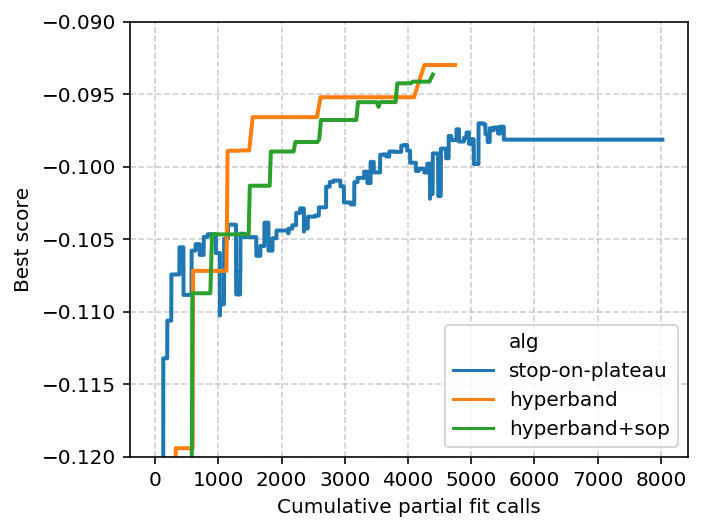

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use()

# adaptiveness = ["patience", "hyperband-w-patience", "hyperband"]
adaptiveness = ["stop-on-plateau", "hyperband", "hyperband+sop"]

show = df.copy()
idx = show.alg == "patience"
show.loc[idx, "alg"] = "stop-on-plateau"
idx = show.alg == "hyperband-w-patience"
show.loc[idx, "alg"] = "hyperband+sop"

# show["Passes through data"] = df["cumulative_partial_fit_calls"] / 3
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.lineplot(
    data=show,
    x="cumulative_partial_fit_calls",
    y="best_score",
    hue="alg",
    hue_order=adaptiveness,
#     palette="magma_r",
    linewidth=2,
    ax=ax,
)
ax.set_ylim(-0.12, -0.09)
ax.grid(linestyle="--", alpha=0.6)
ax.set_ylabel("Best score")
ax.set_xlabel("Cumulative partial fit calls")
plt.savefig(f"{today}-cum-calls.svg", bbox_inches="tight")

In [24]:
# s = df[df.alg == "hyperband-w-patience"]

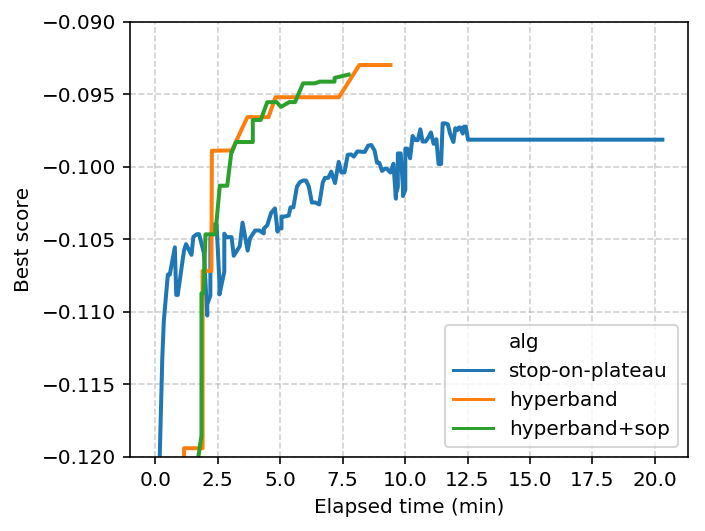

In [26]:
import seaborn as sns

# adaptiveness = ["patience", "hyperband", "hyperband-w-patience"]

# show = df.copy()
show["elapsed_wall_time (min)"] = show["elapsed_wall_time"] / 60

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.lineplot(
    data=show,
    x="elapsed_wall_time (min)",
    y="best_score",
    hue="alg",
    hue_order=adaptiveness,
#     palette="magma_r",
    linewidth=2,
    ax=ax,
)
ax.set_ylim(-0.12, -0.09)
# ax.set_xlim(0, 2)
ax.grid(linestyle="--", alpha=0.6)
ax.set_ylabel("Best score")
ax.set_xlabel("Elapsed time (min)")
plt.savefig(f"{today}-wall-time.svg", bbox_inches="tight")

## Parameter visualization

In [17]:
# results = {k: [result[k] for result in cv_results["patience"]]
#               for k in cv_results["patience"][0]}
# results = {k: sum(v, []) for k, v in results.items()}

In [18]:
import numpy as np
hist = pd.DataFrame(cv_results["patience"])
hist.head()

#hist['param_optimizer_'] = hist['param_optimizer'].apply(lambda opt: str(opt).replace('<class', '').strip('>'))
hist['test_loss'] = -1 * hist['test_score']
hist = hist.sort_values(by='test_loss')
hist['rank'] = np.arange(len(hist)) + 1
hist.head()

,mean_partial_fit_time,mean_score_time,std_partial_fit_time,std_score_time,test_score,estimator_id,params,partial_fit_calls,param_train_split,param_optimizer__weight_decay,param_optimizer__nesterov,param_optimizer__momentum,param_optimizer__lr,param_optimizer,param_module__init,param_module__activation,param_batch_size,rank_test_score,test_loss,rank
52,1.348632,0.947150,0.800372,0.215289,-0.098137,52,"{'train_split': None, 'optimizer__weight_decay...",108,None,0.000000,True,0.788789,2.184436,SGD,xavier_normal_,PReLU,512,1,0.098137,1
30,1.468715,0.972150,0.862381,0.185725,-0.099709,30,"{'train_split': None, 'optimizer__weight_decay...",117,None,0.000000,True,0.517518,0.078595,Adam,xavier_normal_,LeakyReLU,256,2,0.099709,2
8,1.331102,0.962183,0.788611,0.223659,-0.101197,8,"{'train_split': None, 'optimizer__weight_decay...",185,None,0.000058,True,0.677678,0.583803,SGD,xavier_uniform_,PReLU,512,3,0.101197,3
5,1.508216,1.019640,0.892244,0.309372,-0.101545,5,"{'train_split': None, 'optimizer__weight_decay...",134,None,0.000112,True,0.518519,0.355673,SGD,xavier_uniform_,PReLU,128,4,0.101545,4
27,1.428549,0.991712,0.853854,0.269961,-0.101667,27,"{'train_split': None, 'optimizer__weight_decay...",130,None,0.000030,True,0.903904,1.300511,SGD,xavier_normal_,LeakyReLU,256,5,0.101667,5


64 estimators


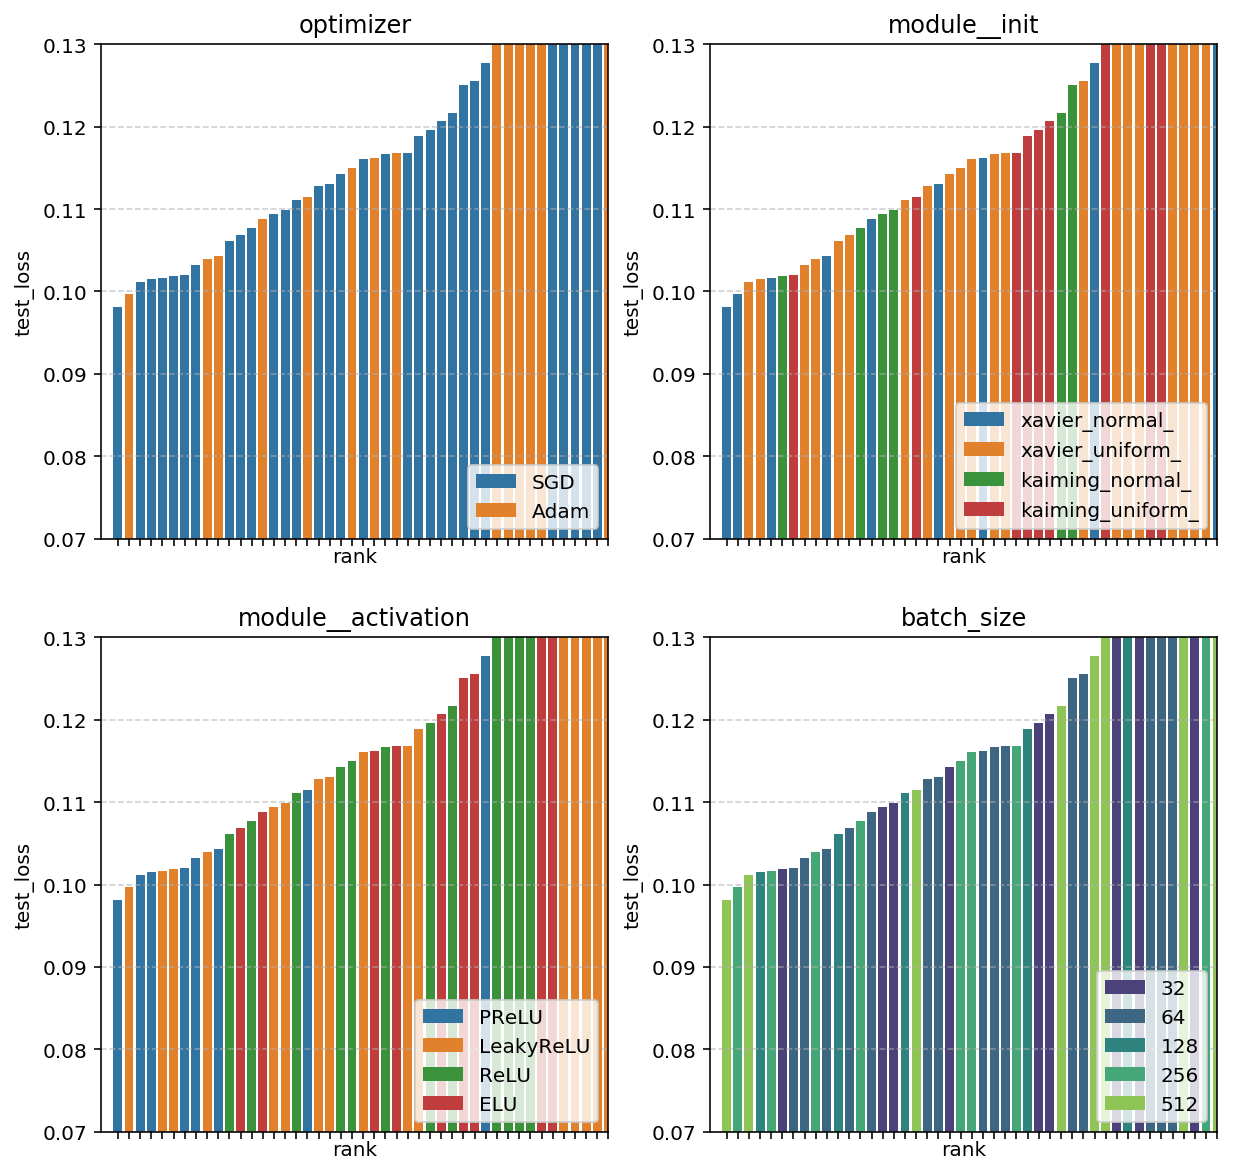

In [19]:
w = 5
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2*w, 2*w))
axs = axs.flat[:]
hues = ['param_optimizer', 'param_module__init', 'param_module__activation', 'param_batch_size']
print("{} estimators".format(len(hist)))
for ax, hue in zip(axs, hues):
    cmap = None
    if 'batch_size' in hue:
        cmap = 'viridis'
    sns.barplot(
        x='rank', 
        y='test_loss',
        hue=hue,
        data=hist,
        ax=ax,
        palette=cmap,
        dodge=False,
    )
    ax.set_xlim(-1.5, 64 - 20)
    ax.grid(linestyle='--', axis='y', alpha=0.6)
    ax.legend(loc='lower right')
    ax.set_title(hue.replace('param_', ''))
    ax.tick_params(labelbottom=False)
#     yticks = [0, 0.03, 0.06, 0.09]
#     yticks = set(yticks).union({0.09, 0.1, 0.11, 0.12})
#     ax.set_yticks(list(yticks))
    ax.set_ylim(0.07, 0.13)
plt.savefig("figs/ranks.svg", bbox_inches="tight")
plt.show()

In [20]:
sgd_alg = [a for a in hist.param_optimizer.unique() if 'sgd' in a.lower()][0]
sgd = hist[hist.param_optimizer == sgd_alg]
sgd.head()

,mean_partial_fit_time,mean_score_time,std_partial_fit_time,std_score_time,test_score,estimator_id,params,partial_fit_calls,param_train_split,param_optimizer__weight_decay,param_optimizer__nesterov,param_optimizer__momentum,param_optimizer__lr,param_optimizer,param_module__init,param_module__activation,param_batch_size,rank_test_score,test_loss,rank
52,1.348632,0.947150,0.800372,0.215289,-0.098137,52,"{'train_split': None, 'optimizer__weight_decay...",108,None,0.000000,True,0.788789,2.184436,SGD,xavier_normal_,PReLU,512,1,0.098137,1
8,1.331102,0.962183,0.788611,0.223659,-0.101197,8,"{'train_split': None, 'optimizer__weight_decay...",185,None,0.000058,True,0.677678,0.583803,SGD,xavier_uniform_,PReLU,512,3,0.101197,3
5,1.508216,1.019640,0.892244,0.309372,-0.101545,5,"{'train_split': None, 'optimizer__weight_decay...",134,None,0.000112,True,0.518519,0.355673,SGD,xavier_uniform_,PReLU,128,4,0.101545,4
27,1.428549,0.991712,0.853854,0.269961,-0.101667,27,"{'train_split': None, 'optimizer__weight_decay...",130,None,0.000030,True,0.903904,1.300511,SGD,xavier_normal_,LeakyReLU,256,5,0.101667,5
32,1.995260,1.192028,1.194554,0.694575,-0.101914,32,"{'train_split': None, 'optimizer__weight_decay...",89,None,0.000015,True,0.820821,4.700804,SGD,kaiming_normal_,LeakyReLU,32,6,0.101914,6


['SGD']


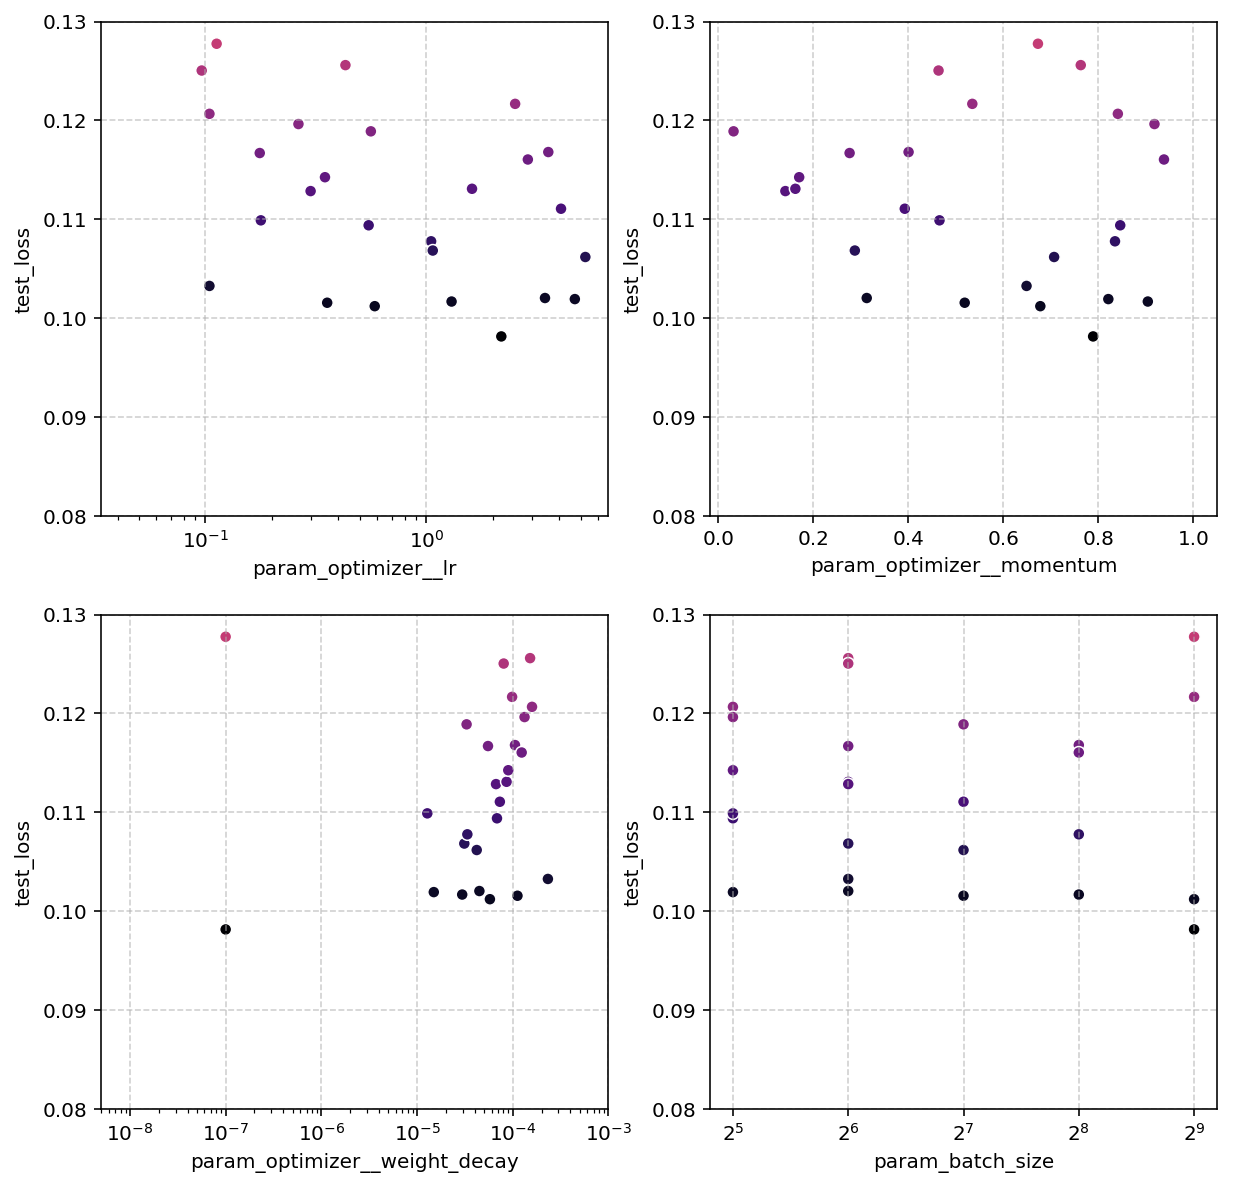

In [21]:
w = 5
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2*w, 2*w))
axs = axs.flat[:]
variables = ['param_optimizer__lr', 'param_optimizer__momentum', 'param_optimizer__weight_decay', 'param_batch_size']
print(sgd.param_optimizer.unique())
for ax, var in zip(axs, variables):
    show = sgd.copy()
    show = show.sort_values(by=var)
    if 'weight_decay' in var:
        show[var] += 1e-7
    show = show[show.test_loss < 0.16]
    sns.scatterplot(
        x=var,
        y='test_loss',
        data=show,
        hue='test_loss',
        palette='magma',
        legend=False,
        ax=ax,
    )
    if 'lr' in var:
        ax.set_xscale('log', basex=10)
    if 'batch_size' in var:
        ax.set_xscale('log', basex=2)
    if 'weight_decay' in var:
        ax.set_xlim(5e-9, 1e-3)
        ax.set_xscale('log', basex=10)
    
    ax.grid(linestyle='--', alpha=0.6)
    ax.set_ylim(0.08, 0.13)
plt.savefig("figs/sgd.png", bbox_inches="tight")
plt.show()